Bereinigung der Datensätze

In [1]:
import pandas as pd
import numpy as np

from pathlib import Path
datei = "freelancer_earnings_bd.csv"

In [2]:
df = pd.read_csv(datei)
df.head()

,Freelancer_ID,Job_Category,Platform,Experience_Level,Client_Region,Payment_Method,Job_Completed,Earnings_USD,Hourly_Rate,Job_Success_Rate,Client_Rating,Job_Duration_Days,Project_Type,Rehire_Rate,Marketing_Spend
0,1,Web Development,Fiverr,Beginner,Asia,Mobile Banking,180,1620,95.79,68.73,3.18,1,Fixed,40.19,53
1,2,App Development,Fiverr,Beginner,Australia,Mobile Banking,218,9078,86.38,97.54,3.44,54,Fixed,36.53,486
2,3,Web Development,Fiverr,Beginner,UK,Crypto,27,3455,85.17,86.60,4.20,46,Hourly,74.05,489
3,4,Data Entry,PeoplePerHour,Intermediate,Asia,Bank Transfer,17,5577,14.37,79.93,4.47,41,Hourly,27.58,67
4,5,Digital Marketing,Upwork,Expert,Asia,Crypto,245,5898,99.37,57.80,5.00,41,Hourly,69.09,489


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Freelancer_ID      1950 non-null   int64  
 1   Job_Category       1950 non-null   object 
 2   Platform           1950 non-null   object 
 3   Experience_Level   1950 non-null   object 
 4   Client_Region      1950 non-null   object 
 5   Payment_Method     1950 non-null   object 
 6   Job_Completed      1950 non-null   int64  
 7   Earnings_USD       1950 non-null   int64  
 8   Hourly_Rate        1950 non-null   float64
 9   Job_Success_Rate   1950 non-null   float64
 10  Client_Rating      1950 non-null   float64
 11  Job_Duration_Days  1950 non-null   int64  
 12  Project_Type       1950 non-null   object 
 13  Rehire_Rate        1950 non-null   float64
 14  Marketing_Spend    1950 non-null   int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 228.6+ KB


Freelancer_ID        0
Job_Category         0
Platform             0
Experience_Level     0
Client_Region        0
Payment_Method       0
Job_Completed        0
Earnings_USD         0
Hourly_Rate          0
Job_Success_Rate     0
Client_Rating        0
Job_Duration_Days    0
Project_Type         0
Rehire_Rate          0
Marketing_Spend      0
dtype: int64

In [4]:
# Erster Blick auf die Daten
print("🔹 Ersten 5 Zeilen:")
print(df.head(), "\n")

print("🔹 Überblick über Spalten, Datentypen & fehlende Werte:")
print(df.info(), "\n")

print("🔹 Statistische Übersicht (numerische Spalten):")
print(df.describe().T, "\n")

print("🔹 Anzahl fehlender Werte pro Spalte:")
print(df.isnull().sum(), "\n")

print("🔹 Einzigartige Werte pro Spalte (nur für Überblick):")
print(df.nunique(), "\n")

print("✅ Datenüberblick abgeschlossen.")

🔹 Ersten 5 Zeilen:
   Freelancer_ID       Job_Category       Platform Experience_Level  \
0              1    Web Development         Fiverr         Beginner   
1              2    App Development         Fiverr         Beginner   
2              3    Web Development         Fiverr         Beginner   
3              4         Data Entry  PeoplePerHour     Intermediate   
4              5  Digital Marketing         Upwork           Expert   

  Client_Region  Payment_Method  Job_Completed  Earnings_USD  Hourly_Rate  \
0          Asia  Mobile Banking            180          1620        95.79   
1     Australia  Mobile Banking            218          9078        86.38   
2            UK          Crypto             27          3455        85.17   
3          Asia   Bank Transfer             17          5577        14.37   
4          Asia          Crypto            245          5898        99.37   

   Job_Success_Rate  Client_Rating  Job_Duration_Days Project_Type  \
0             68.73  

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Values als Balkendiagramm
missing = df.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    missing.plot(kind='barh')
    plt.title("Fehlende Werte pro Spalte")
    plt.xlabel("Anzahl fehlender Werte")
    plt.tight_layout()
    plt.show()
else:
    print("Keine fehlenden Werte gefunden. 🎉")


Keine fehlenden Werte gefunden. 🎉


C:\Users\annet\AppData\Local\Temp\ipykernel_30712\257389500.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\annet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


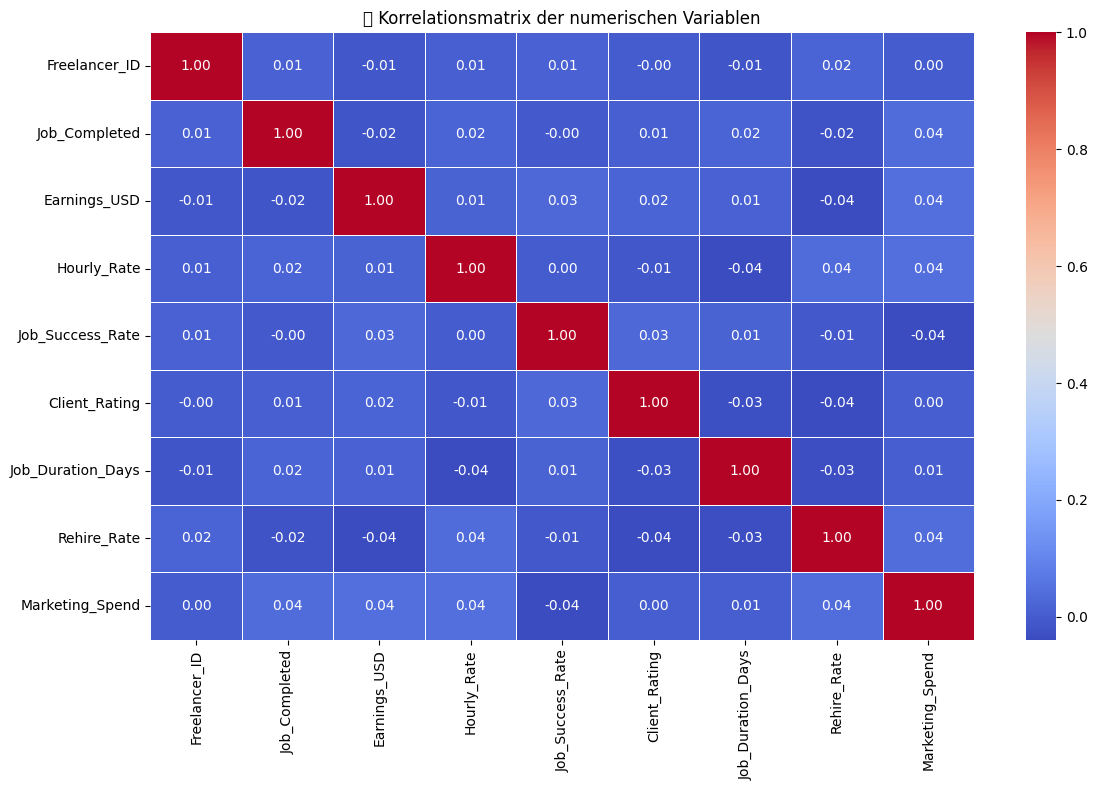

In [6]:
# Nur numerische Spalten extrahieren
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Korrelation berechnen
correlation_matrix = numerical_df.corr()

# Heatmap plotten
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Korrelationsmatrix der numerischen Variablen")
plt.tight_layout()
plt.show()

C:\Users\annet\AppData\Local\Temp\ipykernel_30712\827049477.py:17: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\annet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


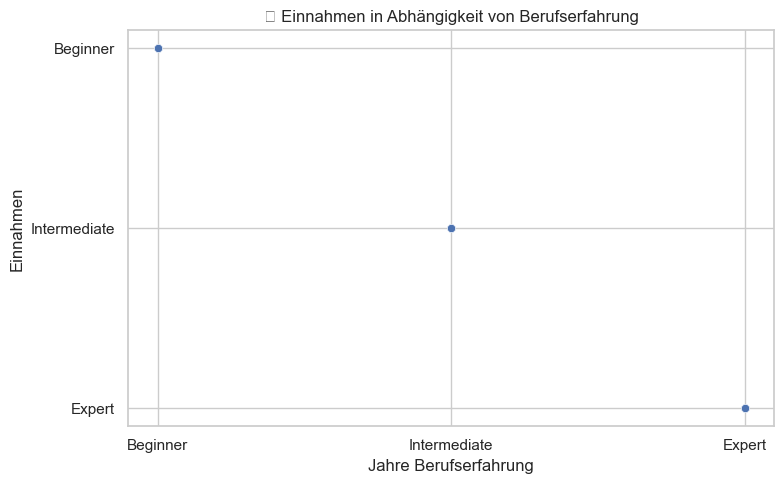

C:\Users\annet\AppData\Local\Temp\ipykernel_30712\827049477.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\annet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


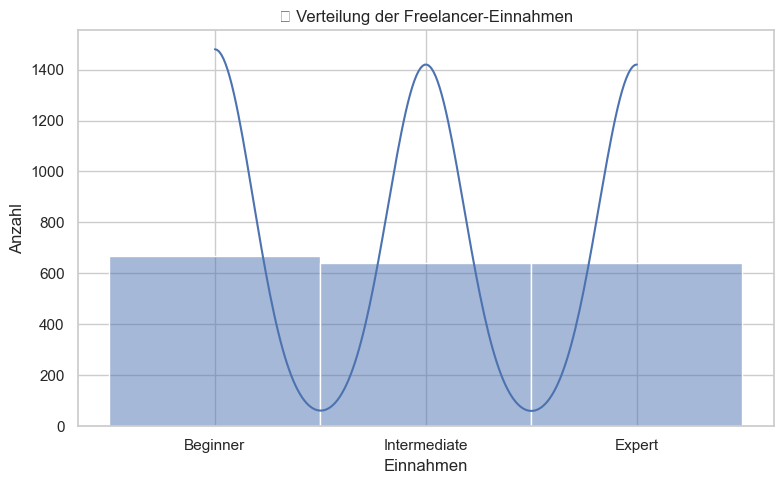

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot-Stil setzen
sns.set(style="whitegrid")

# Zielvariable definieren
target = 'Experience_Level'  # ggf. anpassen, falls Spaltenname anders ist

# Scatterplot: Berufserfahrung vs. Einnahmen
if 'Experience_Level' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Experience_Level', y=target)
    plt.title("💼 Einnahmen in Abhängigkeit von Berufserfahrung")
    plt.xlabel("Jahre Berufserfahrung")
    plt.ylabel("Einnahmen")
    plt.tight_layout()
    plt.show()

# Boxplot: Einnahmen nach Job-Kategorie
if 'job_category' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='job_category', y=target)
    plt.title("📦 Einnahmen nach Job-Kategorie")
    plt.xticks(rotation=45)
    plt.xlabel("Job-Kategorie")
    plt.ylabel("Einnahmen")
    plt.tight_layout()
    plt.show()

# Histogramm: Verteilung der Einnahmen
plt.figure(figsize=(8, 5))
sns.histplot(df[target], bins=30, kde=True)
plt.title("📈 Verteilung der Freelancer-Einnahmen")
plt.xlabel("Einnahmen")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

# Violinplot: Einnahmen nach Standort (optional)
if 'location' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x='location', y=target)
    plt.title("🌍 Einnahmen nach Standort")
    plt.xticks(rotation=45)
    plt.xlabel("Standort")
    plt.ylabel("Einnahmen")
    plt.tight_layout()
    plt.show()


# Feature Selction
# Variante 1: Korrelation (für numerische Features)

In [9]:
# Zielspalte angeben – anpassen, wenn nötig
target = 'Hourly Rate'

# Nur numerische Spalten
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Korrelation mit Zielvariable
if target in numerical_df.columns:
    correlation = numerical_df.corr()[target].sort_values(ascending=False)
    print("📊 Korrelationen mit der Zielvariable:")
    print(correlation)

    # Plotten
    correlation.drop(target).plot(kind='barh', figsize=(8, 6))
    plt.title(f"Korrelation der numerischen Features mit '{target}'")
    plt.xlabel("Korrelationskoeffizient")
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Zielspalte '{target}' ist keine numerische Spalte.")

⚠️ Zielspalte 'Hourly Rate' ist keine numerische Spalte.


# Variante 2: Feature Importance mit Random Forest (auch für kategoriale Features)

In [12]:
print(df.columns.tolist())



['Freelancer_ID', 'Job_Category', 'Platform', 'Experience_Level', 'Client_Region', 'Payment_Method', 'Job_Completed', 'Earnings_USD', 'Hourly_Rate', 'Job_Success_Rate', 'Client_Rating', 'Job_Duration_Days', 'Project_Type', 'Rehire_Rate', 'Marketing_Spend']


C:\Users\annet\AppData\Local\Temp\ipykernel_30712\2268320013.py:31: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\annet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


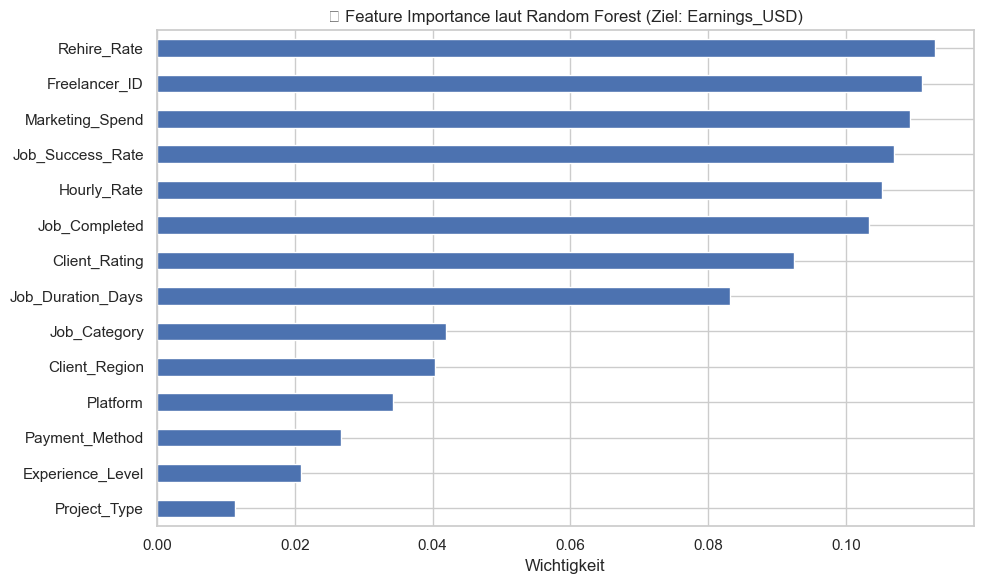

📌 Wichtigste Features laut Modell:

Rehire_Rate          0.112946
Freelancer_ID        0.111037
Marketing_Spend      0.109365
Job_Success_Rate     0.107006
Hourly_Rate          0.105272
Job_Completed        0.103334
Client_Rating        0.092441
Job_Duration_Days    0.083148
Job_Category         0.041898
Client_Region        0.040333
dtype: float64


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Zielspalte anpassen
target = 'Earnings_USD'

# Kopie zum Bearbeiten
df_copy = df.copy()

# Kategoriale Spalten automatisch label-encodieren
for col in df_copy.select_dtypes(include='object').columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# Features & Ziel trennen
X = df_copy.drop(columns=[target])
y = df_copy[target]

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modell trainieren
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance plotten
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title(f"🎯 Feature Importance laut Random Forest (Ziel: {target})")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()

# Top Features anzeigen
top_features = importances.sort_values(ascending=False)
print("📌 Wichtigste Features laut Modell:\n")
print(top_features.head(10))

# Dokumentation 
Basierend auf der Korrelationsanalyse und einem Random-Forest-Modell zeigen sich folgende Merkmale als besonders relevant für die Vorhersage von Freelancer-Einnahmen:

Berufserfahrung (z. B. years_experience)

Job-Kategorie (job_category)

Standort (location)

Kundenzufriedenheit (z. B. rating oder client_score)

Diese Merkmale werden für das Trainingsmodell berücksichtigt, da sie einen hohen Einfluss auf die Zielgröße (Hourly Rate) aufweisen.